
# IFCD104 – Tema 2: CNN paso a paso con Keras (MNIST)

Este cuaderno implementa una **Red Neuronal Convolucional (CNN)** con **TensorFlow / Keras** para clasificar los dígitos del dataset **MNIST**.
Incluye:
- Carga y **preprocesado** de imágenes (28×28 en escala de grises).
- Construcción de una **CNN** pequeña y comentada.
- **Entrenamiento** con validación.
- **Evaluación**: accuracy, **matriz de confusión** y ejemplos de predicción.
- Guardado y carga del **modelo**.



## 1) Importaciones


In [1]:

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



## 2) Carga de datos y preprocesado
- Descargamos **MNIST** desde `keras.datasets` (viene integrado).
- Normalizamos a `[0,1]` y añadimos el canal (1) para CNN.
- Separamos train/val/test.


In [2]:

# Cargar MNIST (60k train, 10k test)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar a [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Añadir canal: (N, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# División de validación
x_train, x_val = x_train[:-10000], x_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

x_train.shape, x_val.shape, x_test.shape


((50000, 28, 28, 1), (10000, 28, 28, 1), (10000, 28, 28, 1))


## 3) Visualización rápida de ejemplos


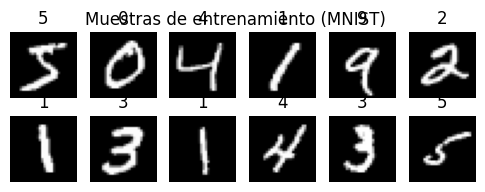

In [3]:

plt.figure(figsize=(6,2))
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(int(y_train[i]))
    plt.axis("off")
plt.suptitle("Muestras de entrenamiento (MNIST)")
plt.show()



## 4) Definición del modelo CNN
Arquitectura sencilla y didáctica:
- `Conv2D(32, 3x3)` + ReLU
- `MaxPool2D(2x2)`
- `Conv2D(64, 3x3)` + ReLU
- `MaxPool2D(2x2)`
- `Flatten` → `Dense(128)` → `Dropout(0.3)` → `Dense(10, softmax)`


In [4]:

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs, name="mnist_cnn_demo")
model.summary()


Model: "mnist_cnn_demo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


## 5) Compilación y entrenamiento
Usamos:
- `loss='sparse_categorical_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy']`


In [5]:

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=3,            # Ajusta si quieres más precisión
    batch_size=128,
    verbose=1
)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9119 - loss: 0.2858 - val_accuracy: 0.9786 - val_loss: 0.0743
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9755 - loss: 0.0796 - val_accuracy: 0.9855 - val_loss: 0.0504
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9826 - loss: 0.0562 - val_accuracy: 0.9855 - val_loss: 0.0490



## 6) Curvas de entrenamiento


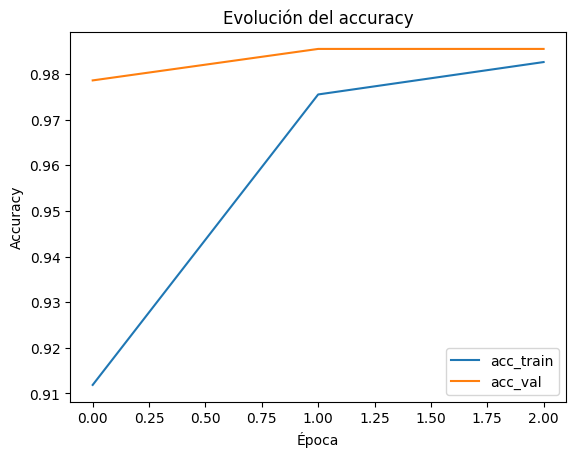

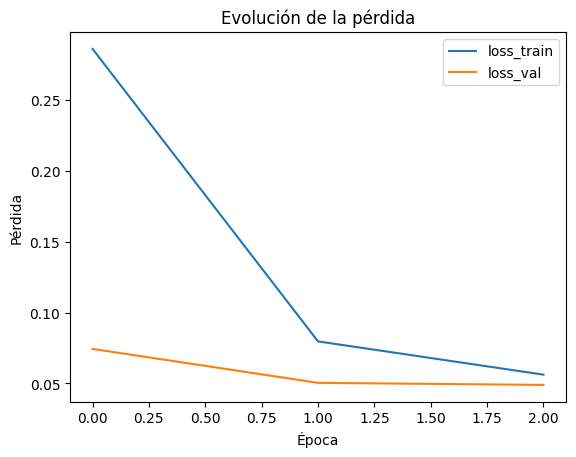

In [6]:

plt.figure()
plt.plot(history.history['accuracy'], label='acc_train')
plt.plot(history.history['val_accuracy'], label='acc_val')
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Evolución del accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss_train')
plt.plot(history.history['val_loss'], label='loss_val')
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida")
plt.legend()
plt.show()



## 7) Evaluación en test


Accuracy en test: 0.9877  |  Pérdida en test: 0.0396

Informe de clasificación (test):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



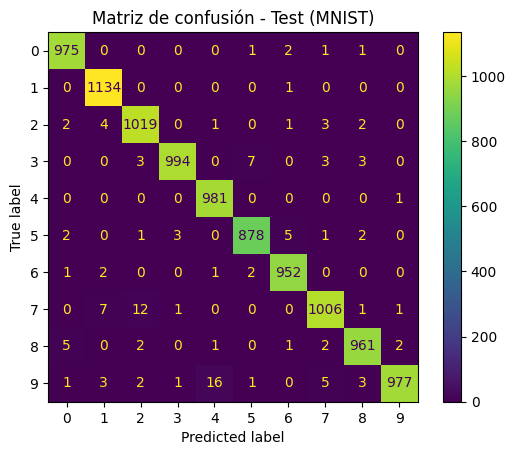

In [7]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy en test: {test_acc:.4f}  |  Pérdida en test: {test_loss:.4f}")

# Predicciones y matriz de confusión
y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

print("\nInforme de clasificación (test):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(values_format='d')
plt.title("Matriz de confusión - Test (MNIST)")
plt.show()



## 8) Predicciones de ejemplo


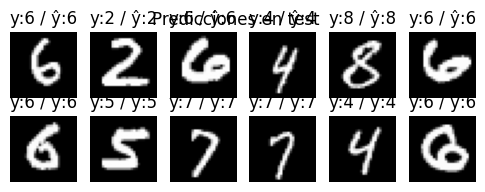

In [8]:

idx = np.random.choice(len(x_test), size=12, replace=False)
images = x_test[idx]
labels_true = y_test[idx]
labels_pred = np.argmax(model.predict(images, verbose=0), axis=1)

plt.figure(figsize=(6,2))
for i in range(12):
    plt.subplot(2,6,i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"y:{labels_true[i]} / ŷ:{labels_pred[i]}")
    plt.axis("off")
plt.suptitle("Predicciones en test")
plt.show()



## 9) Guardar y cargar el modelo


In [11]:

# Guardar en formato Keras
model_path = "mnist_cnn_demo.keras"

#model_path = "/mnt/data/mnist_cnn_demo.keras"
model.save(model_path)
print("Modelo guardado en:", model_path)

# Cargar de nuevo (demostración)
loaded = keras.models.load_model(model_path)
loss2, acc2 = loaded.evaluate(x_test, y_test, verbose=0)
print(f"Cargado -> Accuracy en test: {acc2:.4f}")


Modelo guardado en: mnist_cnn_demo.keras
Cargado -> Accuracy en test: 0.9877
